<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Gradient Descent Code-Along

Let's walk through how gradient descent works using code.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Suppose we have a function with n variables, then the gradient 
# is the length-n vector that defines the direction in which the 
# cost is increasing most rapidly. So in gradient descent, we 
# follow the negative of the gradient to the point where the cost
# is a minimum. In machine learning, the cost function is a 
# function to which we are applying the gradient descent algorithm.

In [ ]:
# Machine learning uses derivatives in optimization problems. 
# Derivatives are used to decide whether to increase or decrease 
# the weights to increase or decrease an objective function. 
# If we can compute the derivative of a function, we know in 
# which direction to proceed to minimize it

In [1]:
# The objective function
# quotient rule - (derivative of numerator * denominator - numerator * derviative of denominator) / denominator squarred
# derviative of natural log is 1/x
# derviative of variable is 1, constant is 0
def f(x):
    return -np.log(x) / (1 + x)

In [2]:
# Derivative of the objective function
def f_deriv(x):
    return -(1 + 1/x - np.log(x)) / (1 + x)**2

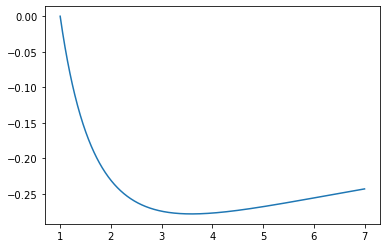

In [5]:
# Let's see what it looks like
xs = np.linspace(1, 7, 1000)
plt.plot(xs, f(xs));

In [10]:
# Initial value and learning rate
x = 1
alpha = 1

# stopping criterion
# tolerance = 0.001

# Iterate and apply gradient descent
x_steps = [x]
for i in range(300):
    # This is gradient descent
    x = x - alpha * f_deriv(x)
    x_steps.append(x)
    # Show our progress
    if i % 10 == 0:
        print(f"Step {i}: {x}")
    
    # check stopping criterion
#     if abs(x_steps[-1] - x_steps[-2]) < tolerance:
#         break

Step 0: 1.5
Step 10: 2.4323456906041288
Step 20: 2.7673589958070934
Step 30: 2.967063182961276
Step 40: 3.103056184481621
Step 50: 3.201958805672409
Step 60: 3.2767692305757543
Step 70: 3.3348433295354707
Step 80: 3.380754470539767
Step 90: 3.417538030000519
Step 100: 3.4473073824474403
Step 110: 3.4715884243952937
Step 120: 3.4915145101602163
Step 130: 3.5079465447758147
Step 140: 3.521550387329923
Step 150: 3.53284864454296


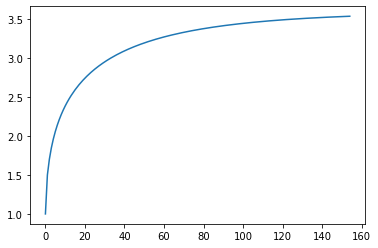

In [12]:
# Plot iterations
plt.plot(x_steps);

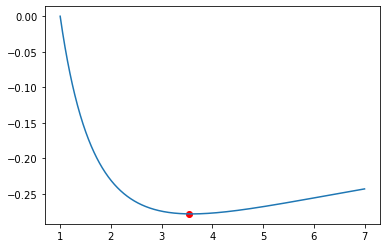

In [54]:
# Plot our solution on the original function
plt.plot(xs, f(xs));
plt.scatter(x_steps[-1], f(x_steps[-1]), color='red');

## Let's see if we can do OLS by Gradient Descent!

In [18]:
# Set a random seed.
np.random.seed(42)

In [19]:
# Randomly generate 100 samples from a Poisson(45) distribution.
temp = np.random.poisson(45, 100)

In [20]:
# View array.
temp

array([42, 50, 37, 47, 52, 38, 41, 44, 47, 41, 44, 38, 47, 47, 41, 49, 36,
       40, 41, 46, 58, 47, 34, 29, 43, 52, 40, 37, 51, 49, 51, 42, 53, 42,
       41, 50, 55, 36, 50, 51, 45, 41, 56, 43, 39, 41, 57, 48, 52, 55, 41,
       39, 43, 36, 59, 45, 63, 45, 40, 47, 30, 56, 37, 48, 39, 42, 48, 34,
       41, 49, 45, 48, 49, 58, 42, 40, 52, 46, 55, 42, 48, 47, 35, 46, 48,
       49, 41, 48, 48, 34, 40, 55, 51, 46, 38, 40, 48, 56, 44, 41])

In [21]:
# Calculate mean and sample variance of array.
print(np.mean(temp))
print(np.var(temp, ddof = 1))

45.18
45.07838383838384


**Ohio State Fun Facts:**
1. Ohio Stadium can seat 104,944 people. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Ohio_Stadium).)
2. Ohio Stadium's record attendance is 110,045 people. (Source: [Wikipedia](https://en.wikipedia.org/wiki/Ohio_Stadium).)
3. Ohio State is better than Michigan. (Source: It's just a fact.)
4. Ohio State students enjoy soda. (Source: first-hand knowledge.)

In [22]:
# sodas ~ 200,000 + 1,000 * temp + N(0, 20,000)
sodas_sold = 200_000 + 1_000 * temp + np.round(np.random.normal(0, 20_000, 100))

In [23]:
sodas_sold

array([233070., 267128., 241282., 222085., 255464., 245706., 223323.,
       247075., 248164., 218141., 251156., 249216., 268661., 268076.,
       213447., 230243., 246301., 250276., 251301., 323055., 269418.,
       269711., 253080., 242028., 236695., 267179., 224543., 232264.,
       241293., 250637., 297293., 204655., 266725., 209746., 231561.,
       271779., 256286., 214445., 235694., 264592., 230393., 245329.,
       256911., 229968., 281879., 253678., 216497., 251729., 238764.,
       272049., 225150., 236705., 253100., 253315., 234994., 238310.,
       253501., 231933., 275309., 255100., 204782., 274357., 279443.,
       268649., 208613., 232315., 273338., 219847., 249876., 264493.,
       226461., 246809., 184175., 237512., 236949., 215044., 284648.,
       217397., 246199., 244615., 276825., 218283., 258263., 246205.,
       228370., 258242., 244981., 235996., 249396., 226294., 242270.,
       268243., 282720., 221244., 280661., 200958., 244964., 267766.,
       249620., 2285

$$ \text{sodas_sold}_i = 200,000 + 1,000 * \text{temp}_i + \varepsilon_i $$

In [24]:
# Create dataframe with temp and sodas_sold.
df = pd.DataFrame({'temp': temp, 'sodas': sodas_sold})

In [25]:
# Check the first five rows.
df.head()

,temp,sodas
0,42,233070.0
1,50,267128.0
2,37,241282.0
3,47,222085.0
4,52,255464.0


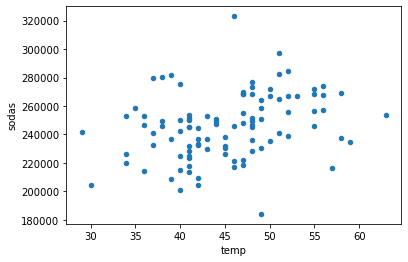

In [28]:
# visualize our data
df.plot(kind='scatter', x='temp', y='sodas');

#### Our goal is to fit a model here.
- You and I know that our $y$-intercept $\beta_0$ is 200,000.
- You and I know that our slope $\beta_1$ is 1,000.
- However, our computer does not know that. Our computer has to estimate $\hat{\beta}_0$ and $\hat{\beta}_1$ from the data.
    - We might say that our **machine** has to... **learn**.

#### Our workflow:
1. Instantiate model.
2. Select a learning rate $\alpha$.
3. Select a starting point $\hat{\beta}_{1,0}$.
4. Calculate the gradient of the loss function.
5. Calculate $\hat{\beta}_{1,i+1} = \hat{\beta}_{1,i} - \alpha * \frac{\partial L}{\partial \beta_1}$.
6. Check value of $\left|\hat{\beta}_{1,i+1} - \hat{\beta}_{1,i}\right|$.
7. Repeat steps 4 through 6 until "stopping condition" is met.

#### Step 1. Instantiate model.

Our model takes on the form:
$$ Y = \beta_0 + \beta_1 X + \varepsilon$$

#### Step 2. Select a learning rate $\alpha$.

$$\alpha = 0.1$$

In [15]:
alpha = 0.1
# Typically, the value of the learning rate is chosen manually, 
# starting with 0.1, 0.01, or 0.001 as the common values

# If the learning rate is too big, the loss will bounce around 
# and may not reach the local minimum.
# If the learning rate is too small then gradient descent will 
# eventually reach the local minimum but require a long time
# The cost function should decrease over time if gradient 
# descent is working properly

#### Step 3. Select a starting point.
The zero-th iteration of $\hat{\beta}_1$ is going to start at, say, 20.
$$\hat{\beta}_{1,0} = 20$$

Two points:
- You and I know that the true value of $\beta_1$ is 1000. We need the computer to figure (machine to learn) that part out!
- We're going to pretend like the computer already knows the value for $\beta_0$. In reality, we'd have to do this for $\beta_0$ and for $\beta_1$ at the same time.

In [16]:
# This actually matters least
beta_1 = 20

#### Step 4. Calculate the gradient of the loss function with respect to parameter $\beta_1$.

The loss function, $L$, is our mean square error.

$$L = \frac{1}{n}\sum_{i = 1} ^ n (y_i - \hat{y}_i)^2 $$

$$\Rightarrow L = \frac{1}{n}\sum_{i = 1} ^ n \left(y_i - \left(\hat{\beta}_0 + \hat{\beta}_1x_i\right)\right)^2 $$

The gradient of this loss function with respect to $\beta_1$ is:

$$\frac{\partial L}{\partial \beta_1} = \frac{2}{n} \sum_{i=1}^n -x_i\left(y_i - \left(\hat{\beta}_1x_i + \hat{\beta}_0\right)\right) $$

In [29]:
# Calculate gradient of beta_1.
def beta_1_gradient(x, y, beta_1, beta_0):
    grad = -x * (y - (beta_1*x + beta_0))
    return 2 * np.mean(grad)

#### Step 5. Calculate $\hat{\beta}_{1,i+1} = \hat{\beta}_{1,i} - \alpha * \frac{\partial L}{\partial \beta_1}$.

In [30]:
# Define function to calculate new value of beta_1.
def update_beta_1(beta_1, alpha, gradient):
    beta_1 = beta_1 - alpha * gradient
    return beta_1

#### Step 6. Check value of $\left|\hat{\beta}_{1,i+1} - \hat{\beta}_{1,i}\right|$.

In [37]:
# Check to see if we've converged
def check_update(beta_1, updated_beta_1, tolerance = 0.1):
    return abs(beta_1 - updated_beta_1) < tolerance

#### Step 7: Save final value of $\hat{\beta}_1$.

#### Putting it all together...

In [57]:
def gradient_descent(x, y, beta_1 = 0, alpha = 0.01, max_iter = 100):   
    # Iterate through our observations.
    for step in range(1, max_iter + 1):
        
        # Calculate gradient.
        gradient = beta_1_gradient(x, y, beta_1, 200_000)
        
        # Update beta_1.
        updated_beta_1 = update_beta_1(beta_1, alpha, gradient)
        
        # Check for convergence.
        converged = check_update(beta_1, updated_beta_1)
        
        # Overwrite beta_1.
        beta_1 = updated_beta_1
        
        # Print out current step findings.
        print(f'Step: {step}, b1 = {beta_1}')
        
        # If we've converged, let us know!
        if converged:
            print(f'Our algorithm converged after {step} iterations with a beta_1 value of {beta_1} 😄👌✌️!')
            break
        
    # If we didn't converge by the end of our loop, let us know!
    if not converged:
        print('WE DID NOT CONVERGE 😒😒😒😭😭!!')
    
    # Return beta_1.
    return beta_1

In [58]:
# Call gradient_descent with an initial beta_1 of 20, alpha of 0.01, and 100 iterations.
gradient_descent(df['temp'], df['sodas'], beta_1 = 20, alpha = 0.01, max_iter = 100)

Step: 1, b1 = 41435.536400000005
Step: 2, b1 = -1644889.1423060796
Step: 3, b1 = 67017530.06550508
Step: 4, b1 = -2728723925.3027844
Step: 5, b1 = 111106040061.21902
Step: 6, b1 = -4523926812130.787
Step: 7, b1 = 184201632837141.66
Step: 8, b1 = -7500174724514217.0
Step: 9, b1 = 3.0538611429303245e+17
Step: 10, b1 = -1.2434467492892217e+19
Step: 11, b1 = 5.06296699801591e+20
Step: 12, b1 = -2.0614983985161335e+22
Step: 13, b1 = 8.39384425920612e+23
Step: 14, b1 = -3.4177383547094743e+25
Step: 15, b1 = 1.391607361363766e+27
Step: 16, b1 = -5.666235525412072e+28
Step: 17, b1 = 2.3071324513530843e+30
Step: 18, b1 = -9.393997344823376e+31
Step: 19, b1 = 3.8249726868864247e+33
Step: 20, b1 = -1.5574217788649202e+35
Step: 21, b1 = 6.341385405439872e+36
Step: 22, b1 = -2.5820345783037628e+38
Step: 23, b1 = 1.0513321833170998e+40
Step: 24, b1 = -4.2807302774559026e+41
Step: 25, b1 = 1.7429935085322762e+43
Step: 26, b1 = -7.096981528561035e+44
Step: 27, b1 = 2.8896921629472515e+46
Step: 28, b1 

-9.432757322212768e+163

<details><summary>What should we do?</summary>

- We **should not** adjust our maximum iterations. It doesn't look like we'll converge.
- We should adjust our alpha!
</details>

In [43]:
gradient_descent(df['temp'],
                 df['sodas'],
                 beta_1 = 20,
                 alpha = 0.0001,
                 max_iter = 100)

Step: 1, b1 = 434.155364
Step: 2, b1 = 675.5367064893921
Step: 3, b1 = 816.2205115697996
Step: 4, b1 = 898.2149723172032
Step: 5, b1 = 946.003639885691
Step: 6, b1 = 973.8562134272975
Step: 7, b1 = 990.089473159405
Step: 8, b1 = 999.5506714625496
Step: 9, b1 = 1005.0649227471749
Step: 10, b1 = 1008.2787827948905
Step: 11, b1 = 1010.1519104187804
Step: 12, b1 = 1011.2436216455569
Step: 13, b1 = 1011.8799015164366
Step: 14, b1 = 1012.2507432410217
Step: 15, b1 = 1012.4668801816782
Step: 16, b1 = 1012.5928508425271
Step: 17, b1 = 1012.6662700708484
Our algorithm converged after 17 iterations with a beta_1 value of 1012.6662700708484 😄👌✌️!


1012.6662700708484